Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

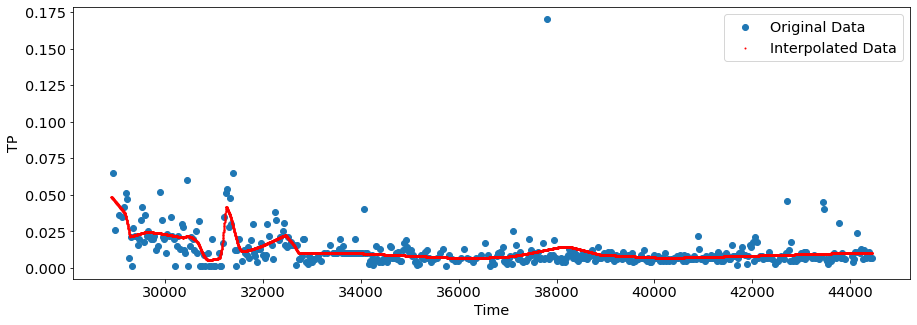

313/313 [==============================] - 0s 337us/step - loss: 2.0922e-17
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//TP/saved_model/my_modelBB02_TP')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/TP_data/BB02.csv")
time = df['time'].values
TP = df['TP'].values
df

#Transform the normalized scale to real scale
TP_min = 0.001
TP_max = 0.17
time_min = 28933.49                 
time_max = 44452.51                      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(TP_max - TP_min) + TP_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, TP*(TP_max - TP_min) + TP_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('TP')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421000041
,0.424801828
,0.428732489
,0.432663151
,0.436593812
,0.440524473
,0.444519571
,0.448321358
,0.45225202
,0.456182681
,0.460113342
,0.464044003
,0.468039102
,0.471840889
,0.47577155
,0.479702211
,0.48169976
,0.483632872
,0.487563534
,0.491558632
,0.495424856
,0.503286179
,0.830755366
,0.869997541
,0.966137649
,0.968070761
,0.97006831
])
interpolation

array([[0.03896875],
       [0.03841061],
       [0.03783356],
       [0.03725649],
       [0.03667944],
       [0.03610238],
       [0.03551586],
       [0.03495772],
       [0.03438065],
       [0.0338036 ],
       [0.03329581],
       [0.03286929],
       [0.03323714],
       [0.03363296],
       [0.03404219],
       [0.03445143],
       [0.0346594 ],
       [0.03486067],
       [0.03526989],
       [0.03570319],
       [0.03617708],
       [0.03714068],
       [0.04253502],
       [0.04601561],
       [0.053889  ],
       [0.05395409],
       [0.05402137]], dtype=float32)